***Andrew Plum***

***MATH 183***

***Assignment #8***

***4/23/2023***

__Problem 1:__ Let $\vec{v}=(\cos \pi/4, \sin \pi/4)$. 

(a) Plot the function $f(x,y) = \cos((x,y) \cdot \vec{v})$ for $(x,y) \in [-2\pi, 2\pi] \times [-2\pi, 2\pi]$.

<IPython.core.display.Javascript object>


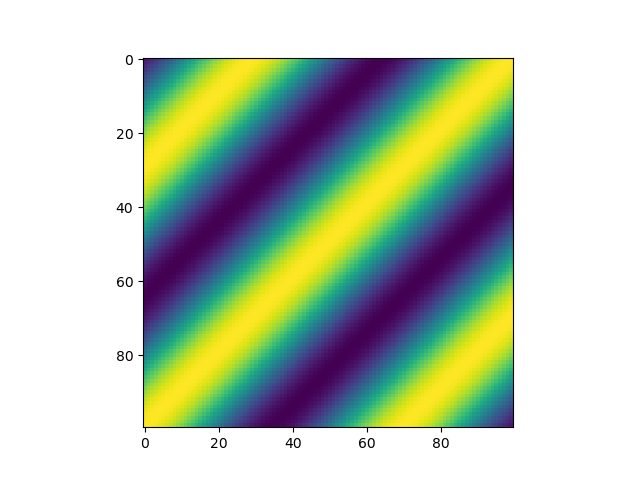

In [17]:
# import packages

import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

# declare angle and v

angle = np.pi/4
v = np.array([np.cos(angle), np.sin(angle)])

# declare x and y and make meshgrid

x = np.linspace(-2*np.pi, 2*np.pi, 100)
y = np.linspace(-2*np.pi, 2*np.pi, 100)
X,Y = np.meshgrid(x,y)

# calculate f

dot = v[0]*X + v[1]*Y
f = np.cos(dot)

# plot f

fig = plt.figure(1)
plt.imshow(f)


(b) Plot the traveling wave function $f(x,y) = \cos((x,y) \cdot \vec{v}-t)$ for $(x,y) \in [-2\pi, 2\pi] \times [-2\pi, 2\pi]$ and $t \in [0,10]$.

<IPython.core.display.Javascript object>


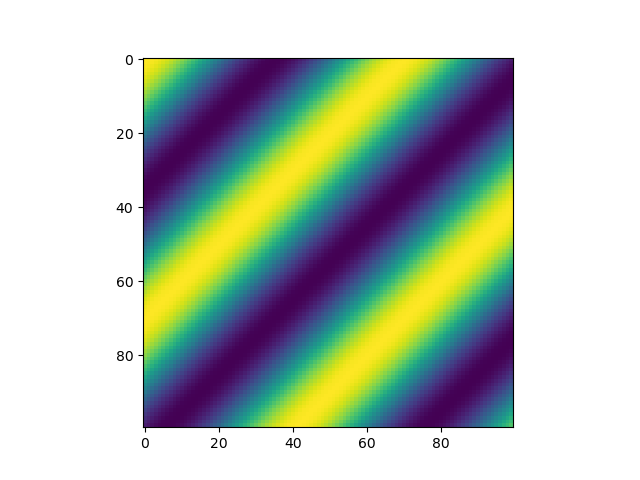

In [18]:
# import packages

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
%matplotlib notebook

# declare angle and v

angle = np.pi/4
v = np.array([np.cos(angle), np.sin(angle)])

# declare x, y, and t and make meshgrid

x = np.linspace(-2*np.pi, 2*np.pi, 100)
y = np.linspace(-2*np.pi, 2*np.pi, 100)
t = np.linspace(0,10,100)
X,Y,T = np.meshgrid(x,y,t) 

# calculate f

dot = v[0]*X + v[1]*Y
f = np.cos(dot-T)

# initialize plot of f

fig = plt.figure(2)
ax = plt.imshow(f[:,:,0])

# define the animate function

def animate(i):
    ax.set_data(f[:,:,i])
    return ax,

# create and show the animation object

ani = animation.FuncAnimation(fig, animate, frames=360, interval=50)


__Problem 2:__ 

(a) Load "retina" from skimage, and convert it into a grayscale image.

<IPython.core.display.Javascript object>


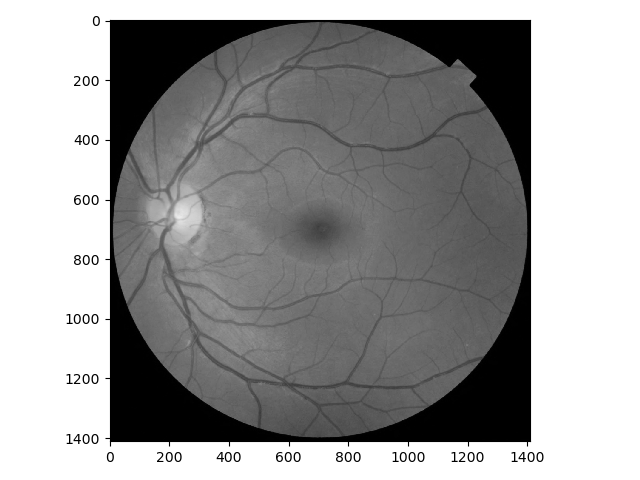

In [19]:
# import packages

from skimage import color, data, io

# load retina and convert to grayscale image

retina = data.retina()
retina_gray = color.rgb2gray(retina)
plt.figure(3)
io.imshow(retina_gray)


(b) Plot its histogram

<IPython.core.display.Javascript object>


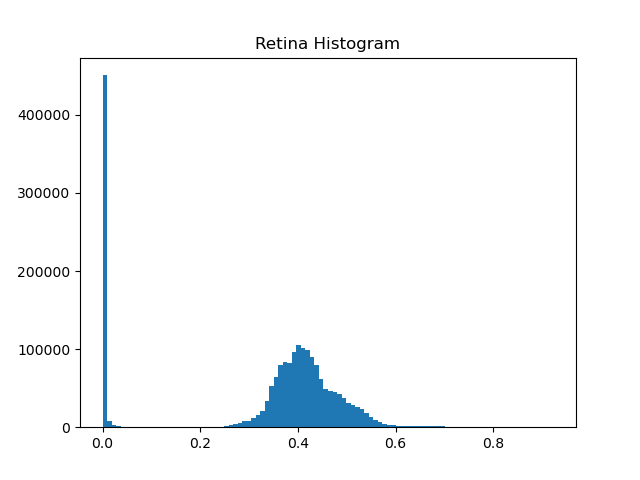

In [20]:
# import packages

import matplotlib.pyplot as plt

# show histogram

plt.figure(4)
plt.hist(retina_gray.ravel(), bins = 100)
plt.title("Retina Histogram")
plt.show()

(c) Do thresholding for the image to turn all blood vessels into black (but try keep the rest as white)

<IPython.core.display.Javascript object>


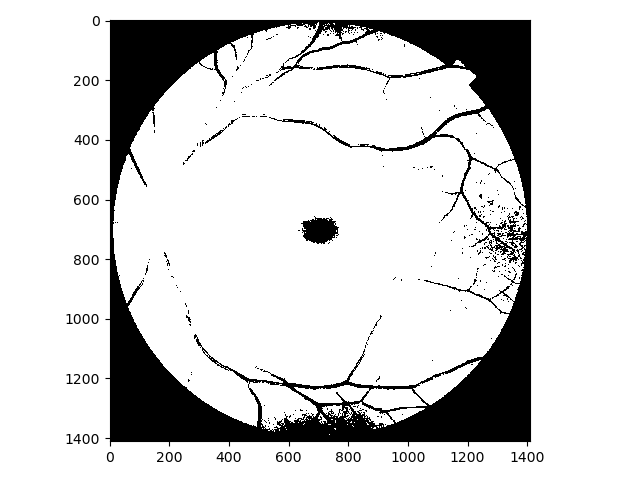

In [21]:
# binarization

thresh = 0.34 # this is a manual estimate
binarized_retina = retina_gray > thresh
plt.figure(5)
io.imshow(binarized_retina)

__Problem 3__ 

(a) Load shepp_logan_phantom from skimage

<IPython.core.display.Javascript object>


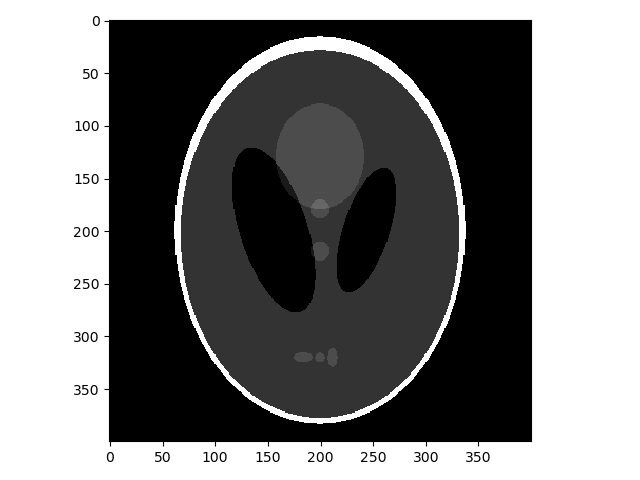

In [22]:
# import packages

from skimage import data, io

# load shepp_logan_phantom and show image

shepp_logan_phantom = data.shepp_logan_phantom()
plt.figure(6)
io.imshow(shepp_logan_phantom)

(b) Use canny algorithm for detecting the edges in the image (play around with the parameters to make it looks good)

<IPython.core.display.Javascript object>


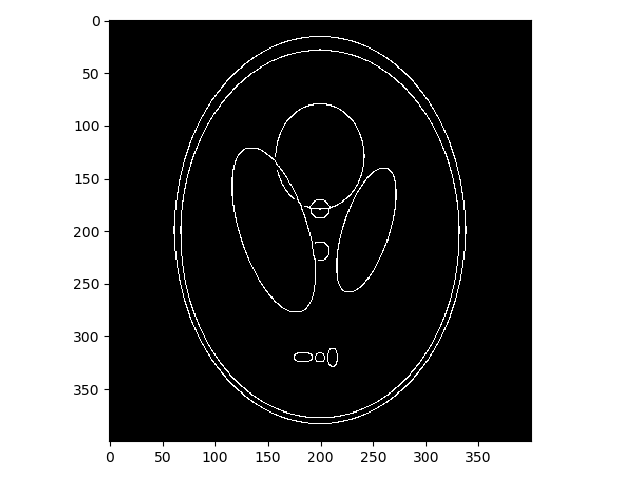

In [23]:
# import packages

from skimage.feature import canny

# use canny algorithm to find edges and show new image 

shepp_logan_phantom_edges_canny = canny(shepp_logan_phantom, sigma = 1)
# I've played with the parameters of canny and this the best I've gotten it to look
# changing the low_threshold and high_threshold erased edges in the image
plt.figure(7)
io.imshow(shepp_logan_phantom_edges_canny)

(c) Generate a noisy version of the shepp_logan_phantom. Then denoise it using the Gaussian filter, median filter, and TV (Chambolle) method.

<IPython.core.display.Javascript object>


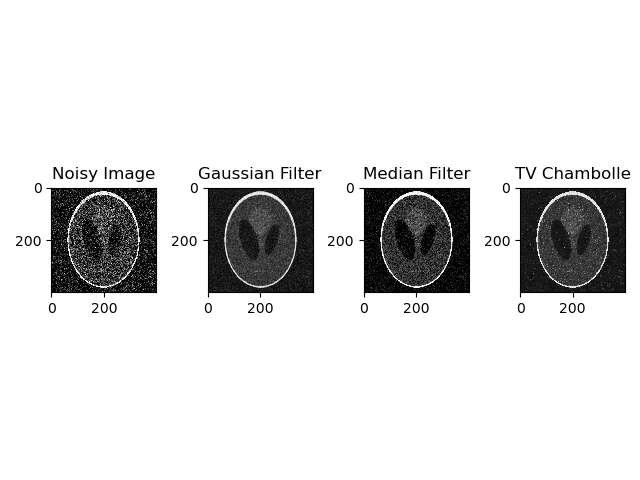

In [16]:
# import packages

from skimage import img_as_float
from skimage.util import random_noise
from skimage.filters import gaussian, median
from skimage.restoration import denoise_tv_chambolle
import matplotlib.pyplot as plt

# generate noisy version of shepp_logan_phantom

sigma = 0.25 # the higher the value the more corrupted
float_shepp_logan_phantom = img_as_float(shepp_logan_phantom) # needs a conversion for the arrays to be stored as float
noisy_shepp_logan_phantom = random_noise(float_shepp_logan_phantom, var = sigma**2)
plt.figure(8) # subplots need to go in this figure
plt.subplot(141)
plt.title("Noisy Image")
io.imshow(noisy_shepp_logan_phantom)

# denoise using gaussian filter

gaussian_denoised_shepp_logan_phantom = gaussian(noisy_shepp_logan_phantom, sigma=1)
plt.subplot(142)
plt.title("Gaussian Filter")
io.imshow(gaussian_denoised_shepp_logan_phantom)

# denoise using median filter

median_denoised_shepp_logan_phantom = median(noisy_shepp_logan_phantom)
plt.subplot(143)
plt.title("Median Filter")
io.imshow(median_denoised_shepp_logan_phantom)

# denoise using TV Chambolle method

tv_denoised_shepp_logan_phantom = denoise_tv_chambolle(noisy_shepp_logan_phantom, weight=0.1)
plt.subplot(144)
plt.title("TV Chambolle")
io.imshow(tv_denoised_shepp_logan_phantom)
